<a href="https://colab.research.google.com/github/stepan-ha/Lab3Security/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритм розрахунку індивідуальних вхідних даних

---

Встановіть значення змінної variant: сума номера групи помноженого на 25 і
порядкового номеру студента в списку групи (групі ПМОм-11 відповідає номер
0, групі ПМІм-11 відповідає номер 1, групі ПМІм-12 відповідає номер 2, групі
ПМІм-13 відповідає номер 3). Далі встановіть set.seed(variant) та згенеруйте
значення змінної redundant як заокруглене до цілого (для заокруглення можна
використати функції floor або round) випадкове число з рівномірного на інтервалі
(номер групи + 5, 25 – номер групи) розподілу (функція runif).


# Завдання 1.1

---

 З допомогою функції read.csv() завантажте дані в R з файлу College.csv.
Модифікуйте завантажені дані College наступним чином: встановивши seed, що
дорівнює значенню змінної variant, видаліть redundant % спостережень з
допомогою функції sample
(College_new=
College[-
sample(1:length(College[,1]),round((redundant/100)*length(College[,1]))),]).

In [3]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

group_number = 2

student_number = 5

variant = group_number * 25 + student_number
print(f"Мій номер індивідуального завдання: {variant}")

random.seed(variant)

redundant = math.floor(random.uniform(group_number + 5, 25 - group_number))
print(f"Redundant: {redundant}%")

df = pd.read_csv('College.csv')

print(df.head())

College_new = df.drop(df.sample(frac=redundant / 100, random_state=variant).index)

print(f"Початковий розмір: {df.shape}")
print(f"Новий розмір: {College_new.shape}")


Мій номер індивідуального завдання: 55
Redundant: 8%
                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   

# Завдання 1.2

---
Перегляньте дані з допомогою функції fix(). Оскільки перший стовпець це
просто назви університетів, виконайте наступні команди:
rownames=College_new[,1]
College_new=College_new[,-1]
fix(College_new)
Що тепер сталося з першим стовпцем? Для чого змінна rownames?

In [10]:
rownames = College_new.iloc[:, 0]

College_new = College_new.iloc[:, 1:]

print("rownames:")
print(rownames.head())
print("\nCollege_new:")
print(College_new.head())

#rownames зберігає усі значення перщої клонки (Назви університетів)

rownames:
0    52
1    29
2    50
3    89
4    44
Name: Top25perc, dtype: int64

College_new:
   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15  


# Завдання 1.3

---


Використовуючи функції summary() та pairs(), отримайте певні підсумки
відносно даних. Використайте pairs() для побудови матриці графіків довільних 3
стовпців даних.
Побудуйте діаграму Outstate vs Private, використовуючи plot() та прокоментуйте
результати.

Опис сету:
        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    715.000000    715.000000    715.000000   715.000000   715.000000   
mean    3602.653147    837.332867  10465.993007  4360.458741   546.967832   
std     4663.892814   1525.105618   4045.696259  1098.234048   158.465763   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      985.500000     94.500000   7332.000000  3580.000000   461.000000   
50%     1707.000000    344.000000   9990.000000  4200.000000   500.000000   
75%     3898.500000    941.500000  12975.000000  5075.000000   600.000000   
max    30017.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   715.000000  715.000000  715.000000  715.000000   715.000000   
mean   1342.212587   72.762238   79.839161   14.045315    22.626573   
std     688.974620   16.271230   14.644265    3.949920    12.403538   
min     250

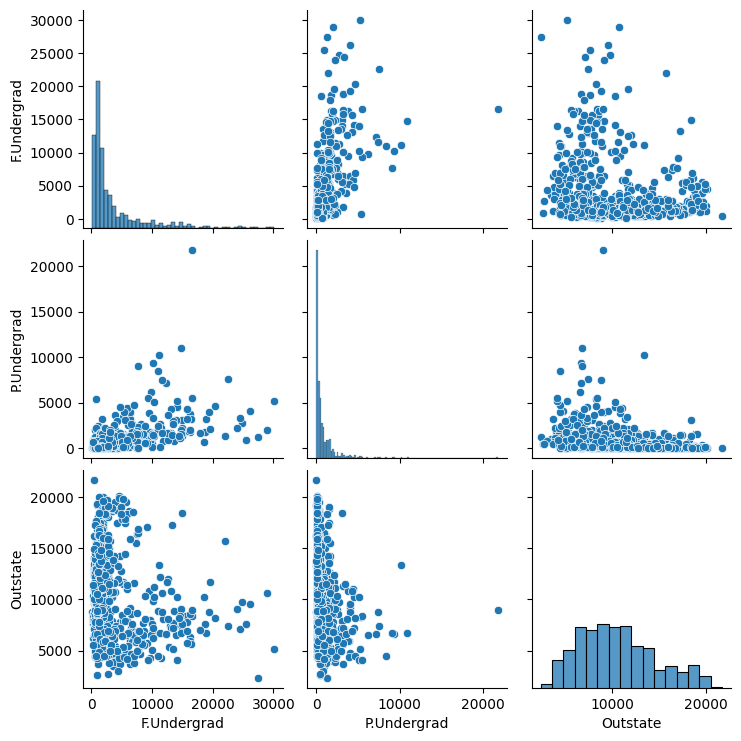

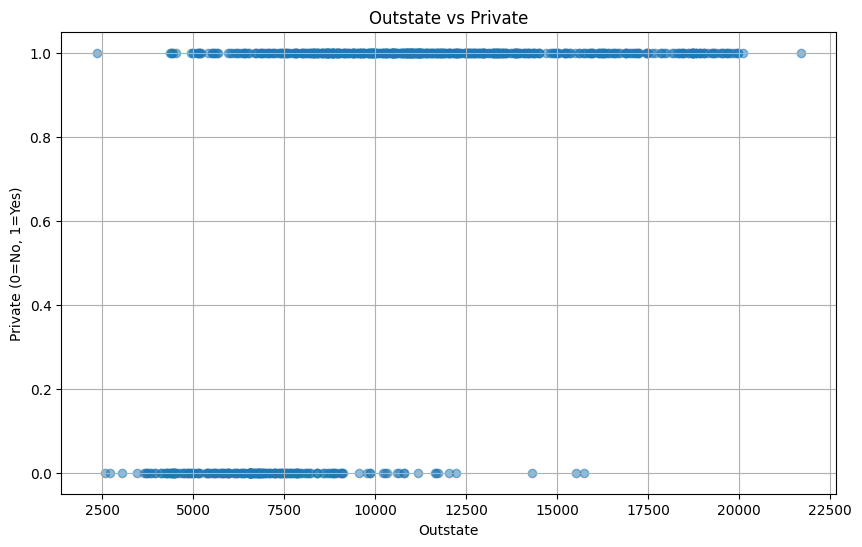

In [16]:
print("Опис сету:")
print(College_new.describe())

sns.pairplot(College_new.iloc[:, :3])
plt.show()

# Побудова діаграми Outstate vs Private
# Для цього припустимо, що Private є категоріальною змінною, яку потрібно закодувати в числовий формат
# Переконайтеся, що Private є колонкою
if 'Private' in df.columns:
    # Перекодування Private в числовий формат
    College_new['Private_num'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Побудова діаграми
    plt.figure(figsize=(10, 6))
    plt.scatter(College_new['Outstate'], College_new['Private_num'], alpha=0.5)
    plt.xlabel('Outstate')
    plt.ylabel('Private (0=No, 1=Yes)')
    plt.title('Outstate vs Private')
    plt.grid(True)
    plt.show()
else:
    print("Колонка 'Private' відсутня в даних.")

# Завдання 1.4

---
Створіть новий якісний показник Elite, використовуючи Top10perc, тобто
поділивши всі університети на дві групи в залежності чи перевищує відсоток
студентів з топ 10% шкіл 50% чи ні.
> Elite=rep("No",nrow(College_new))
> Elite[College_new$Top10perc>50]="Yes"
> Elite=as.factor(Elite)
> College_new=data.frame(College_new,Elite)
Для чого дві останні команди? Чи багато таких університетів? Побудуйте
діаграму Outstate vs Elite та прокоментуйте результати.

Кількість університетів в кожній категорії Elite:
Elite
No     645
Yes     70
Name: count, dtype: int64


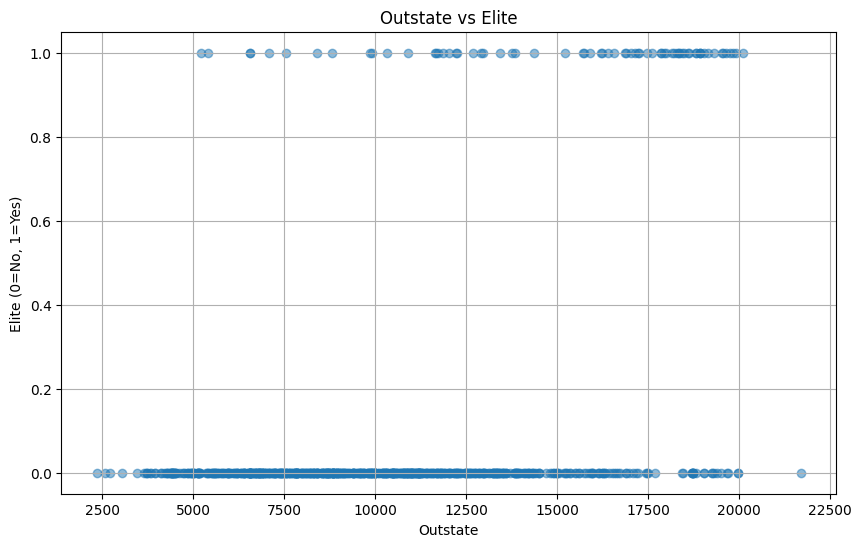

In [ ]:
Elite = ['Yes' if x > 50 else 'No' for x in College_new['Top10perc']]
Elite = pd.Categorical(Elite)  # Перетворення в категоріальну змінну

# Додавання нового стовпця до College_new
College_new['Elite'] = Elite

# Перевірка кількості університетів в кожній категорії
print("Кількість університетів в кожній категорії Elite:")
print(College_new['Elite'].value_counts())

# Побудова діаграми Outstate vs Elite
plt.figure(figsize=(10, 6))

# Перетворення Elite в числовий формат для побудови графіка
College_new['Elite_num'] = College_new['Elite'].apply(lambda x: 1 if x == 'Yes' else 0)

# Побудова графіка
plt.scatter(College_new['Outstate'], College_new['Elite_num'], alpha=0.5)
plt.xlabel('Outstate')
plt.ylabel('Elite (0=No, 1=Yes)')
plt.title('Outstate vs Elite')
plt.grid(True)
plt.show()

# Завдання 2.1

---

Завантажте дані Boston, які є частиною бібліотеки MASS.
> library (MASS)
Дані знаходяться в об’єкті Boston.
> Boston
Перегляньте інформацію про дані:
> ?Boston
Скільки рядків і стовпців міститься в множині?

Скільки кварталів в даній множині межують з річкою Charles?
Обчисліть медіану для відношення учні-вчителі для міста загалом?
Які квартали міста мають найменше та найбільше відношення учні-вчителі?
В яких кварталах в середньому є більше 7 кімнат в помешканні? Більше 8?
Більше 4, але менше 7?

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


boston_df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston_df['TARGET'] = target

# Перегляд інформації
print(boston_df.head())
print(f"Кількість рядків: {boston_df.shape[0]}")
print(f"Кількість стовпців: {boston_df.shape[1]}")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  TARGET  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  
Кількість рядків: 506
Кількість стовпців: 14


# Завдання 2.2

---

Модифікуйте завантажені дані Boston наступним чином: встановивши seed, що
дорівнює значенню змінної variant, видаліть redundant % спостережень з
допомогою функції sample().

In [ ]:
n = boston_df.shape[0]
n_remove = round((redundant / 100) * n)

indices_to_remove = random.sample(range(n), n_remove)
boston_df_new = boston_df.drop(indices_to_remove)

print(f"Кількість рядків після видалення: {boston_df_new.shape[0]}")

Кількість рядків після видалення: 466


# Завдання 2.3

---

Скільки кварталів в даній множині межують з річкою Charles?
Обчисліть медіану для відношення учні-вчителі для міста загалом?
Які квартали міста мають найменше та найбільше відношення учні-вчителі?
В яких кварталах в середньому є більше 7 кімнат в помешканні? Більше 8?
Більше 4, але менше 7?

In [ ]:
# Кількість кварталів, що межують з річкою Charles
river_neighbors = boston_df_new['CHAS'].sum()
print(f"Кількість кварталів, що межують з річкою Charles: {river_neighbors}")
# Медіана для відношення учні-вчителі
median_student_teacher_ratio = boston_df_new['PTRATIO'].median()
print(f"Медіана відношення учні-вчителі: {median_student_teacher_ratio}")
# Квартал з найменшим відношенням учні-вчителі
min_ptratio_quarter = boston_df_new.loc[boston_df_new['PTRATIO'].idxmin()]
print(f"Квартал з найменшим відношенням учні-вчителі: {min_ptratio_quarter}")

# Квартал з найбільшим відношенням учні-вчителі
max_ptratio_quarter = boston_df_new.loc[boston_df_new['PTRATIO'].idxmax()]
print(f"Квартал з найбільшим відношенням учні-вчителі: {max_ptratio_quarter}")
# Квартали, де в середньому більше 7 кімнат
quarters_more_than_7_rooms = boston_df_new[boston_df_new['RM'] > 7]
print(f"Кількість кварталів з середньою кількістю кімнат більше 7: {quarters_more_than_7_rooms.shape[0]}")

# Квартали, де в середньому більше 8 кімнат
quarters_more_than_8_rooms = boston_df_new[boston_df_new['RM'] > 8]
print(f"Кількість кварталів з середньою кількістю кімнат більше 8: {quarters_more_than_8_rooms.shape[0]}")

# Квартали, де в середньому більше 4, але менше 7 кімнат
quarters_between_4_and_7_rooms = boston_df_new[(boston_df_new['RM'] > 4) & (boston_df_new['RM'] <= 7)]
print(f"Кількість кварталів з середньою кількістю кімнат більше 4, але менше 7: {quarters_between_4_and_7_rooms.shape[0]}")


Кількість кварталів, що межують з річкою Charles: 29.0
Медіана відношення учні-вчителі: 19.0
Квартал з найменшим відношенням учні-вчителі: CRIM         0.04011
ZN          80.00000
INDUS        1.52000
CHAS         0.00000
NOX          0.40400
RM           7.28700
AGE         34.10000
DIS          7.30900
RAD          2.00000
TAX        329.00000
PTRATIO     12.60000
B          396.90000
LSTAT        4.08000
TARGET      33.30000
Name: 196, dtype: float64
Квартал з найбільшим відношенням учні-вчителі: CRIM         0.04301
ZN          80.00000
INDUS        1.91000
CHAS         0.00000
NOX          0.41300
RM           5.66300
AGE         21.90000
DIS         10.58570
RAD          4.00000
TAX        334.00000
PTRATIO     22.00000
B          382.80000
LSTAT        8.05000
TARGET      18.20000
Name: 354, dtype: float64
Кількість кварталів з середньою кількістю кімнат більше 7: 54
Кількість кварталів з середньою кількістю кімнат більше 8: 11
Кількість кварталів з середньою кількістю кімнат б